In [ ]:
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/customer-churn.csv')

In [ ]:
df.head()

,ID,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Plan,Status,Age,Customer Value,Churn
0,1,3,no,10,2,1603,25,32,11,3,pre-paid,active,30,193.120,no
1,2,8,no,37,0,4255,65,0,13,2,pre-paid,active,25,194.400,yes
2,3,0,no,38,0,0,0,0,0,2,pre-paid,not-active,25,0.000,yes
3,4,10,no,36,0,2338,54,327,20,2,pre-paid,active,25,1579.140,yes
4,5,10,no,37,0,4083,60,0,31,1,pre-paid,active,15,227.865,yes


In [ ]:
df.tail()

,ID,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Plan,Status,Age,Customer Value,Churn
3145,3146,0,no,16,0,1200,19,12,9,2,pre-paid,active,25,108.855,yes
3146,3147,9,no,15,0,5897,134,69,37,1,post-paid,active,15,711.205,yes
3147,3148,5,no,13,0,8437,164,57,35,4,pre-paid,active,45,357.525,yes
3148,3149,1,no,14,2,2357,38,15,14,3,pre-paid,active,30,155.800,yes
3149,3150,0,no,7,0,3895,33,199,5,3,pre-paid,active,30,953.120,yes


In [ ]:
df.shape

(3150, 15)

In [ ]:
df.describe()

,ID,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Age,Customer Value
count,3150.000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,1575.500,7.627937,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,30.998413,470.972916
std,909.471,7.263886,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,8.831095,517.015433
min,1.000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000
25%,788.250,1.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,25.000000,113.801250
50%,1575.500,6.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,30.000000,228.480000
75%,2362.750,12.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,30.000000,788.388750
max,3150.000,36.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,55.000000,2165.280000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3150 non-null   int64  
 1   Call Failure             3150 non-null   int64  
 2   Complains                3150 non-null   object 
 3   Subscription  Length     3150 non-null   int64  
 4   Charge Amount            3150 non-null   int64  
 5   Seconds of Use           3150 non-null   int64  
 6   Freq. of use             3150 non-null   int64  
 7   Freq. of SMS             3150 non-null   int64  
 8   Distinct Called Numbers  3150 non-null   int64  
 9   Age Group                3150 non-null   int64  
 10  Plan                     3150 non-null   object 
 11  Status                   3150 non-null   object 
 12  Age                      3150 non-null   int64  
 13  Customer Value           3150 non-null   float64
 14  Churn                   

In [ ]:
df.isnull().sum()

,0
ID,0
Call Failure,0
Complains,0
Subscription Length,0
Charge Amount,0
Seconds of Use,0
Freq. of use,0
Freq. of SMS,0
Distinct Called Numbers,0
Age Group,0


In [ ]:
df['Age'].mean()

30.998412698412697

In [ ]:
df = df.rename(columns={'ID':'Age'})

In [ ]:
df.head()

,Age,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Plan,Status,Age,Customer Value,Churn
0,1,3,no,10,2,1603,25,32,11,3,pre-paid,active,30,193.120,no
1,2,8,no,37,0,4255,65,0,13,2,pre-paid,active,25,194.400,yes
2,3,0,no,38,0,0,0,0,0,2,pre-paid,not-active,25,0.000,yes
3,4,10,no,36,0,2338,54,327,20,2,pre-paid,active,25,1579.140,yes
4,5,10,no,37,0,4083,60,0,31,1,pre-paid,active,15,227.865,yes


<Axes: ylabel='Call Failure'>

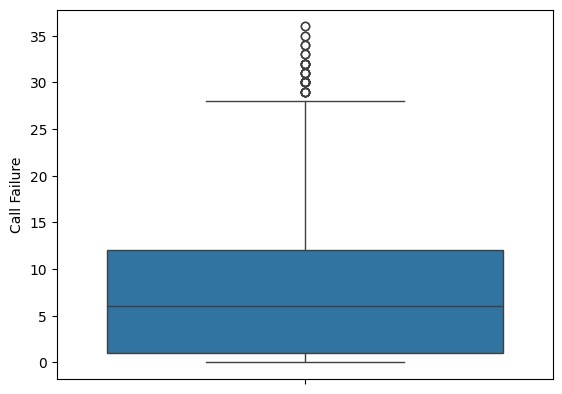

In [ ]:
sns.boxplot(df['Call Failure'])

In [ ]:
df['Call Failure'].min(), df['Call Failure'].max()

(0, 36)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['CallFailure_minmax'] = MinMaxScaler().fit_transform(df[['Call Failure']].values.reshape(len(df),1))

In [ ]:
df[df['CallFailure_minmax']== 1]

,Age,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Plan,Status,Age,Customer Value,Churn,CallFailure_minmax
1762,1763,36,no,41,5,16155,242,69,34,3,post-paid,active,30,931.880,yes,1.0
1783,1784,36,no,34,5,17090,255,15,82,2,post-paid,active,25,848.025,yes,1.0


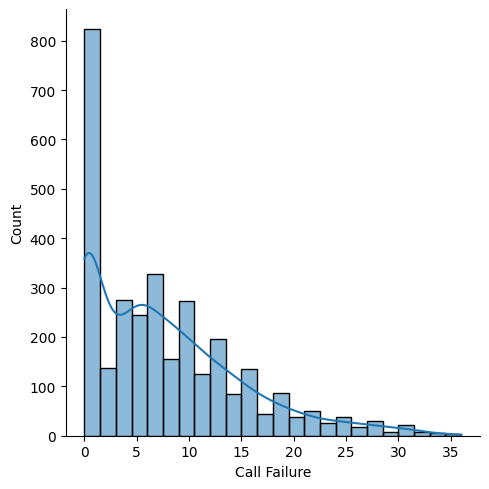

In [ ]:
sns.displot(df['Call Failure'],kde='hist')

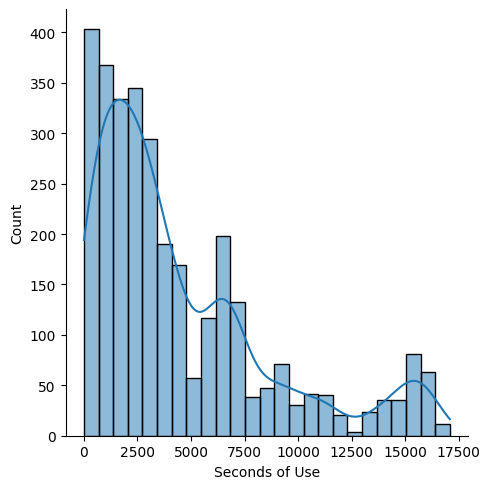

In [ ]:
sns.displot(df['Seconds of Use'],kde='hist')

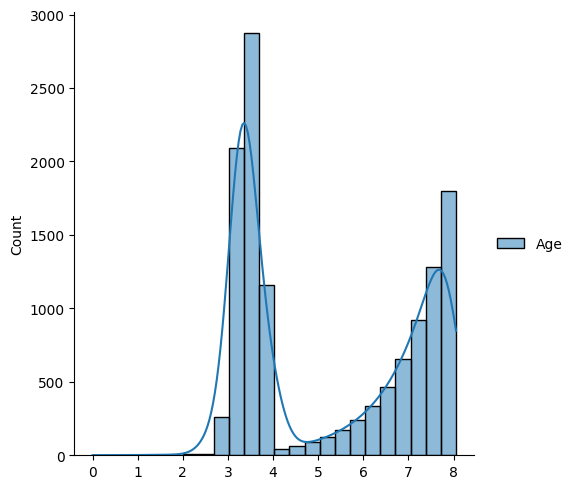

In [ ]:
df['Age'] = np.log(df['Age'])
sns.displot(df['Age'],kde= 'hist')

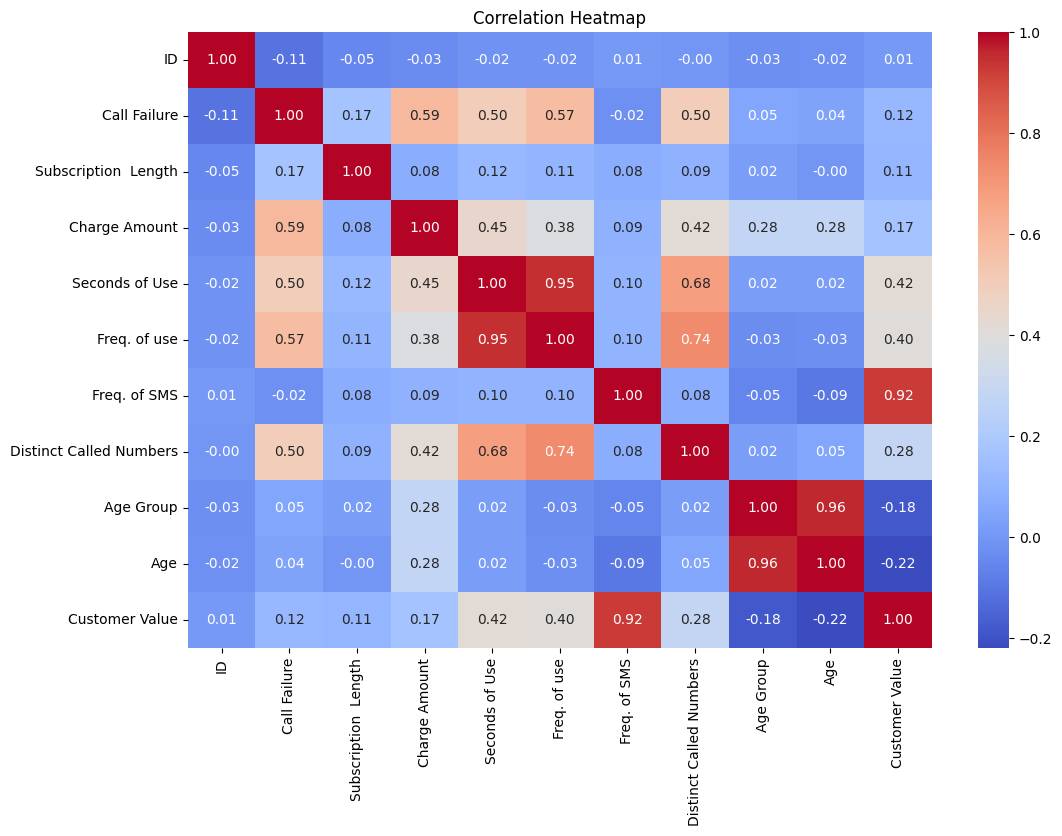

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = df.iloc[:,1]
X.head(5)

,Call Failure
0,3
1,8
2,0
3,10
4,10


In [ ]:
y = df.iloc[:,5]
y.head(5)

,Seconds of Use
0,1603
1,4255
2,0
3,2338
4,4083


Text(0, 0.5, 'Second of use')

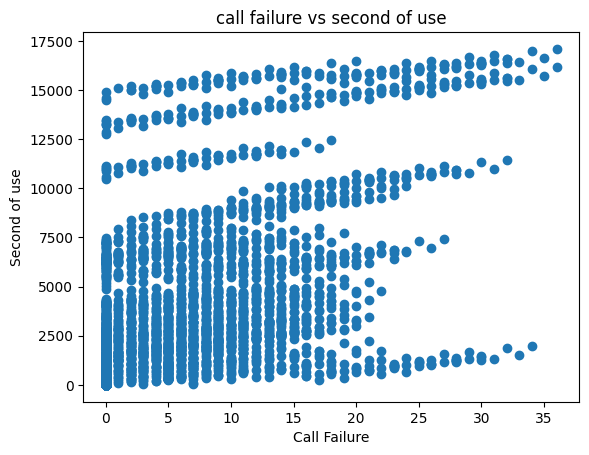

In [ ]:
plt.scatter(X,y)
plt.title('call failure vs second of use')
plt.xlabel('Call Failure')
plt.ylabel('Second of use')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2520,)
(630,)
(2520,)
(630,)


In [ ]:
linear = LinearRegression()
linear.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression()

In [ ]:
linear.coef_

array([297.23320402])

In [ ]:
linear.intercept_

2241.6203496731328

In [ ]:
Y_pred = linear.predict(np.array(X_test).reshape(-1,1))

In [ ]:
Y_pred

array([ 3430.55316577,  5511.18559394,  5511.18559394,  9672.45045029,
        5511.18559394,  7294.58481809,  2538.8535537 ,  3727.7863698 ,
        2836.08675772,  3133.31996175,  4025.01957382,  6105.65200199,
        7591.81802212,  6402.88520602,  2241.62034967,  4619.48598187,
        2241.62034967,  2241.62034967,  3133.31996175,  3727.7863698 ,
        5213.95238992,  5808.41879797,  4322.25277785,  6700.11841004,
        3430.55316577,  3430.55316577,  7294.58481809,  4619.48598187,
        2241.62034967,  2241.62034967,  2241.62034967,  2538.8535537 ,
        6105.65200199,  2241.62034967,  2241.62034967,  6402.88520602,
        4322.25277785,  4025.01957382,  2241.62034967,  4619.48598187,
        5213.95238992,  2241.62034967, 10564.15006236,  3430.55316577,
        6997.35161407,  2241.62034967,  4916.71918589,  9077.98404224,
        2241.62034967,  2241.62034967,  2241.62034967,  3430.55316577,
        6997.35161407, 11158.61647041,  6997.35161407,  4619.48598187,
      

In [ ]:
y_test

,Seconds of Use
2965,15295
969,7873
1385,4623
1233,16120
2996,6203
...,...
765,5485
1041,1070
790,0
2815,15000


In [ ]:
score = r2_score(y_test,Y_pred)
score

0.2287216830728681

Text(0, 0.5, 'Second od use')

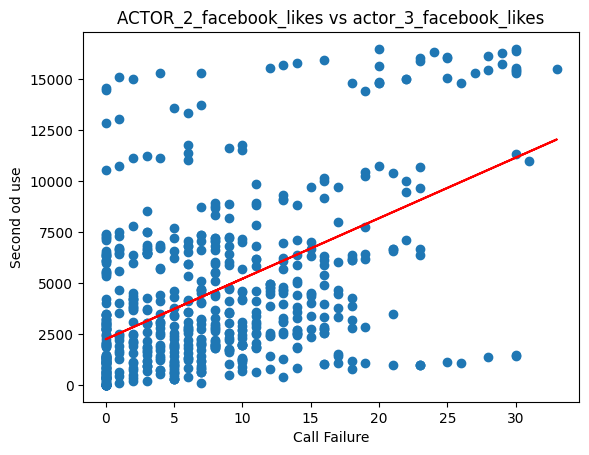

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,Y_pred,color='red')
plt.title('call failure vs second of use')
plt.xlabel('Call Failure')
plt.ylabel('Second od use')